#### Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

#### Подгрузим исходные данные

In [2]:
assessments = pd.read_csv(
    '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/first_project_a-pozdniakov/assessments.csv')

courses = pd.read_csv(
    '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/first_project_a-pozdniakov/courses.csv')

student_assessments = pd.read_csv(
    '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/first_project_a-pozdniakov/studentAssessment.csv')

student_reg = pd.read_csv(
    '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/first_project_a-pozdniakov/studentRegistration.csv')

## 0) Анализ исходных данных

последовательно проанализируем исходные данные и сделаем предварительные выводы

Сначала посмотрим на таблицу assessments, и проверим на наличие пропущенных значений

In [3]:
print(assessments.head(), '\n')
print(assessments.isna().sum(), '\n')

  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0 

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64 



В поле date пропущена информация о дедлайнах, стало понятно(после рецензии проверяющего), что в текущей ситуации, предельный
срок сдачи экзамена неопределен, соответственно в будующем следует это учесть 

Посмотрим на количество уникальных элементов по полям

In [4]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Сгруппируем данные по модулю и семестру и посчитаем количество тестов/экзаменов по каждому модулю

In [5]:
assessments.groupby(['code_module', 'code_presentation'], as_index = False) \
           .agg({'id_assessment': 'count'})

,code_module,code_presentation,id_assessment
0,AAA,2013J,6
1,AAA,2014J,6
2,BBB,2013B,12
3,BBB,2013J,12
4,BBB,2014B,12
5,BBB,2014J,6
6,CCC,2014B,10
7,CCC,2014J,10
8,DDD,2013B,14
9,DDD,2013J,7


Проверим, все ли модули оканчиваются экзаменом

In [15]:
assessments[assessments.assessment_type == "Exam"] \
            .groupby(['code_module', 'code_presentation'], 
                     as_index = False) \
            .agg({'id_assessment': 'count'})

,code_module,code_presentation,id_assessment,assessment_type,date,weight
54,CCC,2014B,24286,CMA,18.0,2.0
55,CCC,2014B,24287,CMA,67.0,7.0
56,CCC,2014B,24288,CMA,137.0,8.0
57,CCC,2014B,24289,CMA,207.0,8.0
58,CCC,2014B,24282,TMA,32.0,9.0
59,CCC,2014B,24283,TMA,102.0,22.0
60,CCC,2014B,24284,TMA,151.0,22.0
61,CCC,2014B,24285,TMA,200.0,22.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0


Выводы:

1) - Имеем 7 уникальных модулей или дисциплин

2) - всего имеем 4 уникальных семестра

3) - Каждый модуль/дисциплина изучаются 2 и более раз за период наблюдений(2 и более семестра)

4) - Модули включают в себя от 6 до 14 проверочных тестов/экзаменов

5) - У модулей BBB и DDD количество проверочных тестов/экзаменов в некоторых семестрах различно, у остальных повторяется
     то есть одинаково в каждом семестре

6) - Во всех модулях присутствует итоговый экзамен,а в модуле ССС 2 экзамена 

### Теперь проанализируем таблицу courses, и проверим ее на наличие пустых значений

In [16]:
print(courses.head())
print(courses.isna().sum())

  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


Выводы по таблице courses:

1) - В этой таблице нам интересно только поле - продолжительность дисциплины/модуля

2) - Таблица содержит 22 строки и не имеет пропущенных значений

3) - Для связи с таблицей assessments необходимо использовать поля code_module и code_presentation

### Далее посмотрим таблицу student_assessments, и проверим ее на наличие пустых значений

In [15]:
print(student_assessments.head())
print(student_assessments.isna().sum())

   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


23369

Мы видим что поле score в 173 строках является пустым, для дальнейшего анализа примем, что отсутствие информации об оценке за
тест/экзамен будет считаться 0(ноль), добавим информацию в таблицу

In [3]:
student_assessments = student_assessments.fillna(0)

Выводы по таблице student_assessments:

1) На первый взгляд это самая важная таблица

2) поле id_assessment является ключем для связи с таблицей assessments

### Проанализируем последнюю таблицу из имеющихся исходных данных - student_reg и проверим на наличие пустых значений

In [18]:
print(student_reg.head())
print(student_reg.isna().sum())

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


У 45 студентов поле date_registration пустое, большинство из них отменило регистрацию, но есть и те, кто закончил курс
Откорректируем таблицу, приняв дату регистрации за 0 для студетов окончивших курс, для остальных, если дата регистрации меньше
чем 0, примем дату отмены регистрации, если больше, примем 0

Для пустых значений в дате отмены регистрации ничего менять не будем

Напишем вспомогательную функцию для редактирования таблицы и применим её при редактировании

In [4]:
def true_date_reg(date_unreg):
    if (math.isnan(date_unreg)) or (date_unreg > 0):
        return 0
    else:
        return date_unreg
    
student_reg.date_registration = student_reg.apply(lambda x: x.date_registration 
                                                  if 
                                                  math.isnan(x.date_registration) == False 
                                                  else 
                                                  true_date_reg(x.date_unregistration), 
                                                  axis = 1)    

Посмотрим сколько раз одни и те же студенты регистрировались на курсы, и выведем количество студентов по количеству регистраций

In [20]:
student_reg.groupby('id_student', 
                    as_index=False) \
           .agg({'date_registration': 'count'}) \
           .sort_values('date_registration') \
           .groupby('date_registration', 
                    as_index=False) \
           .agg({'id_student': 'count'}) 

,date_registration,id_student
0,1,25247
1,2,3293
2,3,221
3,4,23
4,5,1


Посмотрим сколько раз одни и те же студенты отменяли регистрацию на курсы, и выведем количество студентов по количеству отмен

In [21]:
student_reg[student_reg.date_unregistration.isna() == False] \
           .groupby('id_student',
                    as_index = False) \
           .agg({'date_unregistration': 'count'}) \
           .sort_values('date_unregistration') \
           .groupby('date_unregistration',
                    as_index = False) \
           .agg({'id_student': 'count'}) 

,date_unregistration,id_student
0,1,8166
1,2,850
2,3,59
3,4,6
4,5,1


Выводы по таблице student_reg:

1) Есть студенты которые более одного раза регистрируются на курсы

2) В наших данных есть студенты которые несколько раз отменяют регистрацию

### Объединим таблицы student_assessment и assessment для дальнейшего анализа

Сгруппируем данные, чтобы понять как распределены студенты по модулям и семестрам

In [29]:
sa = student_assessments.merge(assessments, 
                               how = 'inner', 
                               on = 'id_assessment')

sa.groupby(['id_student', 'code_module', 'code_presentation'], 
           as_index = False) \
            .agg({'id_assessment': 'nunique'}) \
            .groupby(['id_student'], as_index = False) \
            .agg({'code_module': 'nunique', 'code_presentation': 'nunique'}) \
            .rename(columns={'code_module': 'number_of_modules', 'code_presentation': 'number_of_presentations'}) \
            .groupby(['number_of_modules', 'number_of_presentations'], as_index = False) \
            .agg({'id_student': 'count'})

,number_of_modules,number_of_presentations,id_student
0,1,1,20996
1,1,2,655
2,1,3,9
3,2,1,540
4,2,2,1114
5,2,3,46
6,3,2,4
7,3,3,5


После анализа Исходных данных:

1) Уникальные студенты сгруппированны в основном в рамках code_module и code_presentation, то есть, внутри одного семестра и одного модуля.

2) В каждом новом семестре или новом модуле - id студентов фактически всегда меняется

### вывод:

### Курс - модуль объединяющий несколько контрольных тестов/экзаменов, заканчивается курс либо финальным экзаменом либо по совоекупному результату сдачи промежуточных тестов. Курс длиться только один семестр.

## Задание 1
1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов)

Объединим в один dataframe необходимые данные

In [5]:
sa = student_assessments.merge(assessments, 
                               how = 'inner', 
                               on = 'id_assessment')

Исходя из из условия курс заканчивается экзаменом (assessment_type is Exam), и успешная сдача - когда студент набрал 40 баллов и более. 
Отберем студентов по этим критериям, затем, сгруппируем данные по id_student и посчитаем количество успешно завершенных курсов для каждого студента, далее отберем сдавших ровно 1 курс, посчитаем их количество и выведем на экран

In [6]:
first_query_only_exam = sa.query('(assessment_type == "Exam") and (score >= 40)') \
                          .groupby('id_student', as_index = False) \
                          .agg({'score': 'count'}) \
                          .rename(columns={'score': 'count_positive_exam'}) \
                          .sort_values('id_student') \
                          .query('count_positive_exam == 1')

count_students_pass_one_exam = first_query_only_exam.id_student.count()

print(f'Количество студентов успешно сдавших только один курс = {count_students_pass_one_exam}')

Количество студентов успешно сдавших только один курс = 3802


## 2 задание
Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)

1 Объединим в один dataframe необходимые данные;

2 добавим новое поле-маркер(сдал/не сдал) - is_passed;

3 Сгруппируем данные и получим информацию о количестве сдававших и сдавших тест/экзамен;

4 Добавим столбец с метрикой - процент сдаваемости finalizability;

In [7]:
#1
sa = student_assessments.merge(assessments, 
                               how = 'inner', 
                               on = 'id_assessment')
#2
sa['is_passed'] = sa.score >= 40

#3
second_query = sa.groupby(['code_module','id_assessment','assessment_type','weight','code_presentation'], 
                          as_index = False) \
                 .agg({'score': 'count', 'is_passed': 'sum', 'id_student': 'nunique'})

4#
second_query['finalizability'] = second_query.is_passed/second_query.score*100

##### 5. сложный и легкий экзамен найдем фильтрацией типа проверок по эквивалентности экзамену и сортировкой по завершаемости

* Ввиду того, что программа курса может отличаться в зависимости от семестра, добавим ранжирование с учетом code_presentation

##### 6 сложный и легкий курс за весь период наблюдений найдем сначала группировкой по модулю с нахождением средней завершаемости внутри курса, а далее сортировкой по средней завершаемости

##### 7 сложный и легкий курс с учетом семестра найдем сначала группировкой по модулю и семестру с нахождением средней завершаемости внутри курса, а далее сортировкой по средней завершаемости

In [8]:
#5.1
hard_exam = second_query.sort_values('finalizability') \
                        .query('assessment_type == "Exam"') \
                        .head(1)

#5.2
easy_exam = second_query.sort_values('finalizability') \
                        .query('assessment_type == "Exam"') \
                        .tail(1)

power_courses_pres = second_query \
                        .groupby(['code_module','code_presentation'], 
                                 as_index = False) \
                        .agg({'finalizability':'mean'}) \
                        .rename(columns={'finalizability':'mean_finalizability'}) \
                        .sort_values('mean_finalizability', 
                                     ascending = True)

power_courses = second_query \
                        .groupby(['code_module'], 
                                 as_index = False) \
                        .agg({'finalizability': 'mean'}) \
                        .rename(columns={'finalizability': 'mean_finalizability'}) \
                        .sort_values('mean_finalizability', 
                                     ascending = True)

#6.1
hard_course = power_courses.head(1)

#6.2
easy_course = power_courses.tail(1)

#7.1
hard_course_pres = power_courses_pres.head(1)

#7.2
easy_course_pres = power_courses_pres.tail(1)


print(f'Самый сложный курс:')
print(hard_course[['code_module', 'mean_finalizability']], '\n')
print(f'Самый легкий курс:')
print(easy_course[['code_module', 'mean_finalizability']], '\n')

print(f'Самый сложный курс с учетом семестра:')
print(hard_course_pres[['code_module', 'code_presentation', 'mean_finalizability']], '\n')
print(f'Самый легкий курс с учетом семестра:')
print(easy_course_pres[['code_module', 'code_presentation', 'mean_finalizability']], '\n')

print(f'Самый сложный экзамен:')
print(hard_exam[['code_module', 'code_presentation', 'id_assessment', 'finalizability']],'\n')
print(f'Самый легкий экзамен:')
print(easy_exam[['code_module', 'code_presentation', 'id_assessment', 'finalizability']])

Самый сложный курс:
  code_module  mean_finalizability
3         DDD            89.694054 

Самый легкий курс:
  code_module  mean_finalizability
5         FFF            97.959303 

Самый сложный курс с учетом семестра:
   code_module code_presentation  mean_finalizability
10         DDD             2014B            88.359792 

Самый легкий курс с учетом семестра:
  code_module code_presentation  mean_finalizability
3         BBB             2013J            98.609947 

Самый сложный экзамен:
   code_module code_presentation  id_assessment  finalizability
72         DDD             2013B          25340        83.72093 

Самый легкий экзамен:
   code_module code_presentation  id_assessment  finalizability
93         DDD             2014B          25361       92.557252


## 3 Задание.

По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (7 баллов) 

1. Объединим исходные данные в общую таблицу

2. Отфильтруем данные по наличию экзамена и оценке равной или более 40

3. Сгруппируем данные по модулю,id экзаменов и id студентов и найдем последнюю успешную дату сдачи экзамена

4. Сгруппируем данные по модулю и получим средний срок сдачи экзаменов

5. Выведем результат

In [10]:
#1
sa = student_assessments.merge(assessments, 
                               how = 'inner', 
                               on = 'id_assessment')

#2
sa = sa.query('assessment_type == "Exam" and score >= 40')

#3
sa = sa.groupby(['code_module', 'id_assessment', 'id_student'], as_index = False) \
        .agg({'date_submitted': 'max'})

#4
mean_date_submitted = sa.groupby(['code_module'], as_index = False) \
        .agg({'date_submitted': 'mean'})

#5
print(mean_date_submitted)

  code_module  date_submitted
0         CCC      239.345217
1         DDD      237.976006


## 4 Задание.
Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

Работать будем с таблицей student_reg

1. Сгруппируем данные student_reg по модулю и семестру и найдем количество уникальных студентов, данные сохраним в dataframe reg

2. Отберем из student_reg только отменивших регистрацию, далее сгруппируем данные по модулю и семестру и найдем количество уникальных студентов отменивших регистрацию, данные сохраним в dataframe unreg

3. Объединим reg и unreg в один dataframe date_reg_unreg

4. Посчитаем отток как отношение количества отменивших регистрацию к количеству зарегистрированных в процентах

5. Отберем топ 3 предмета по количеству зарегистрированных студентов с учетом семестра

6. Отберем топ 3 предмета по оттоку студентов с учетом семестра

7. Выведем результат

In [12]:
#1
reg = student_reg.groupby(['code_module','code_presentation'], as_index=False) \
            .agg({'id_student':'nunique'}) \
            .rename(columns={'id_student':'number_of_registration'}) \
            .sort_values(['code_module','code_presentation'], ascending=False)

#2
unreg = student_reg.query('date_unregistration.isna() == False') \
            .groupby(['code_module','code_presentation'], as_index=False) \
            .agg({'id_student':'nunique'}) \
            .rename(columns={'id_student':'number_of_unregistration'}) \
            .sort_values(['code_module','code_presentation'], ascending=False)

#3
data_reg_unreg = pd.merge(reg, 
                          unreg,  
                          how='inner', 
                          left_on=['code_module','code_presentation'], 
                          right_on = ['code_module','code_presentation'])

#4
data_reg_unreg['outflow'] = round(data_reg_unreg['number_of_unregistration']/data_reg_unreg['number_of_registration']*100,2)

#5
top_3_reg = data_reg_unreg.sort_values('number_of_registration', ascending=False) \
                          .head(3)

#6
top_3_outflow = data_reg_unreg.sort_values('outflow', ascending=False) \
                              .head(3)

#7.1
print('Топ 3 предмета по количеству регистраций:')
print(top_3_reg[['code_module','code_presentation','number_of_registration']],'\n')

#7.2
print('Топ 3 предмета по оттоку:')
print(top_3_outflow[['code_module','code_presentation','outflow']],'\n')

Топ 3 предмета по количеству регистраций:
   code_module code_presentation  number_of_registration
14         CCC             2014J                    2498
3          FFF             2014J                    2365
16         BBB             2014J                    2292 

Топ 3 предмета по оттоку:
   code_module code_presentation  outflow
15         CCC             2014B    46.38
14         CCC             2014J    41.99
11         DDD             2014B    39.82 



## Задание 5

Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов (15 баллов)

1. Получим необходимые данные соединив таблицы student_assessments и assessments

2. Отберем только студентов сдававших экзамены и сохраним в data_only_exam

3. Сгруппируем данные в data_only_exam по семестру и найдем общее количество попыток сдачи экзаменов

4. Отфильтруем data_only_exam по оценкам >= 40, затем сгруппируем данные по семестру и найдем количество сдавших экзамен

5. Объединим в один dataframe 3 и 4 в таблицу data_finaliz

6. Добавим в data_finaliz новое поле - завершаемость(кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)

7. Для поиска средних сроков сдачи курсов по семестрам сгруппируем data_only_exam по модулю, семестру, экзаменам и студентам и найдем последнюю попытку сдать экзамен, далее сгруппируем по семестру и найдем средние сроки сдачи курсов

8. Объединим данные из пп6 и пп7.

9. Найдем семестр с самой низкой завершаемостью курсов, используя сортировку по полю 'finalizability'

10. Найдем семестр с самыми долгими средними сроками сдачи курсов, используя сортировку по полю 'mean_date_submitted'

11. Выведем полученные результаты на экран

In [13]:
#1
sa = student_assessments.merge(assessments, how='inner', on='id_assessment')

In [14]:
#2
data_only_exam = sa.query('assessment_type=="Exam"')

#3
attempts = data_only_exam.groupby(['code_presentation'], as_index=False) \
                .agg({'weight':'count'}) \
                .rename(columns={'weight':'number_of_attempts'})

#4
wins = data_only_exam.query('score >= 40') \
                .groupby(['code_presentation'], as_index=False) \
                .agg({'weight':'count'}) \
                .rename(columns={'weight':'number_of_graduates'})

#5
data_finaliz = pd.merge(attempts, 
                        wins,  
                        how='inner', 
                        left_on=['code_presentation'], 
                        right_on=['code_presentation'])

#6
data_finaliz['finalizability'] = data_finaliz.number_of_graduates/data_finaliz.number_of_attempts

#7
data_mean_sub = data_only_exam.groupby(['code_module','code_presentation','id_assessment','id_student'], as_index=False) \
                .agg({'date_submitted':'max'}) \
                .groupby(['code_presentation'], as_index=False) \
                .agg({'date_submitted':'mean'}) \
                .rename(columns={'date_submitted':'mean_date_submitted'})

#8
total_data = data_finaliz.merge(data_mean_sub, 
                                how='inner', 
                                on='code_presentation')

#9
min_final = total_data[['code_presentation','finalizability','mean_date_submitted']] \
                .sort_values('finalizability') \
                .head(1)

#10
max_date_sub = total_data[['code_presentation','finalizability','mean_date_submitted']] \
                .sort_values('mean_date_submitted', ascending=False) \
                .head(1)

#11.1
print('Cеместр с самой низкой завершаемостью курсов:')
print(min_final,'\n')

#11.2
print('Cеместр с самыми долгими средними сроками сдачи курсов:')
print(max_date_sub)

Cеместр с самой низкой завершаемостью курсов:
  code_presentation  finalizability  mean_date_submitted
0             2013B        0.837209           230.179402 

Cеместр с самыми долгими средними сроками сдачи курсов:
  code_presentation  finalizability  mean_date_submitted
3             2014J        0.878659           243.674221


### Задание 6.

Часто для качественного анализа аудитории использую подходы, основанные на сегментации.

Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.

В адаптированной кластеризации можешь выбрать следующие метрики:

R - среднее время сдачи одного экзамена,

F - завершаемость курсов,

M - среднее количество баллов, получаемое за экзамен.

Подробно опиши, как ты создавал кластеры.

Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

##### 1. Объединим две таблицы для анализа student_assessments и assessments

* Отберем данные для RFM-кластеризации, согласно условию задачи

##### 2. Для дальнейшего анализа отфильтруем только сдачи экзаменов

In [15]:
#1
sa = student_assessments.merge(assessments, how='inner', on='id_assessment')

#2
data_only_exam = sa.query('assessment_type == "Exam"')

#### Первая необходимая нам метрика - R - среднее время сдачи одного экзамена

##### 3. Сгруппируем данные по id_student, code_module, code_presentation и id_assessment и найдем последний срок попытки сдачи экзамена

* Если посмотреть на количество строк до и после группировки, мы увидим что в обоих случаях их 4959, что говорит нам: Студенты сдавали экзамен единожды по каждому курсу где он присутствует, соответственно, в исходных данных, отфильтрованных по экзамену мы понимаем что группировка по четырем вышеперечисленным полям нам ничего не изменит, поэтому исходные данные нам необходимо группировать только по студенту

##### 4. Сгруппируем данные по id_student и найдем средний срок попытки сдачи экзамена студента для всех курсов, которые он изучал

In [16]:
#3
date_final_sub = data_only_exam.groupby(['id_student','code_module','code_presentation','id_assessment'], as_index=False) \
                               .agg({'date_submitted':'max'})

#4
date_mean_sub = data_only_exam.groupby(['id_student'], as_index=False) \
                              .agg({'date_submitted':'mean'}) \
                              .rename(columns={'date_submitted':'recency'})

#### Следующая необходимая нам метрика - F - завершаемость курсов

##### 5. Найдем ее принимая во внимание вышеполученную информацию, добавим к фильтрованным по экзамену данным новое поле is_pass - прошел студент текущий курс или нет(score>=40)

##### 6. Сгруппируем данные по id_student и найдем сколько курсов завершил каждый студент

In [17]:
#5
data_only_exam['is_pass'] = data_only_exam.score>=40

#6
number_of_pass = data_only_exam.groupby(['id_student'], as_index=False) \
                               .agg({'is_pass':'sum'}) \
                               .rename(columns={'is_pass':'frequency'})

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Последняя необходимая нам метрика - M - среднее количество баллов, получаемое за экзамен

##### 7. Сгруппируем данные по id_student и найдем средний балл

In [18]:
#7
m_score = data_only_exam.groupby(['id_student'], as_index=False) \
               .agg({'score':'mean'}) \
               .rename(columns={'score':'monetary'})

#### Объединим полученные метрики в общую таблицу

##### 8. Сначала объединим первые две метрики, затем добавим третью

In [19]:
#8
data_rfm = pd.merge(date_mean_sub, 
                        number_of_pass,  
                        how='inner', 
                        left_on=['id_student'], 
                        right_on = ['id_student'])

data_rfm = data_rfm.merge(m_score,  
                        how='inner', 
                        on='id_student')

#### Напишем функции для RFM-сегментации наших данных

##### 9. Назначим разбивку на 2 группы по средним срокам сдачи (метрика R), в качестве среднего возьмем 238 дней с начала семестра(среднее = 238.46):

*1 группа - средний срок сдачи меньше 238

*2 группа - средний срок сдачи больше 238 

##### 10. разбивка frequency(завершаемость курсов) говорит нам о том, что большинство студентов заканчивают один курс, назначим разбивку на 3 группы:

*1 группа - не завершили ни одного курса

*2 группа - завершили 1 курс

*3 группа - завершили 2 курса

##### 11. Разбивка monetary(средний балл за экзамен/тест) на 4 группы по возрастанию среднего балла:

*1 группа - меньше 40 баллов (не сдал)

*2 группа - от 40 до 65 баллов (норма)

*3 группа - от 65 до 80 балла (хорошо)

*4 группа - более 80 баллов (отлично)

##### 12. Добавим разбивку по группам в общие данные

##### 13. Соберем данные в комплексный RFM-балл

In [20]:
#9
def r_group(x):
    if x<=238:
        return 2
    else:
        return 1
    
#10
def f_group(x):
    if x==0:
        return 1
    elif x==1:
        return 2
    else:
        return 3

#11    
def m_group(x):
    if x<40:
        return 1
    elif x>=40 and x<65:
        return 2
    elif x>=65 and x<80:
        return 3
    else:
        return 4
    
#12.1
data_rfm['r_score'] = data_rfm.apply(lambda x: r_group(x.recency), 
                                     axis=1)
#12.2
data_rfm['f_score'] = data_rfm.apply(lambda x: f_group(x.frequency), 
                                     axis=1)
#12.3
data_rfm['m_score'] = data_rfm.apply(lambda x: m_group(x.monetary), 
                                     axis=1)

#13
data_rfm['rfm_score'] = data_rfm.apply(lambda x: int(x.r_score*100 + x.f_score*10 + x.m_score), 
                                       axis=1)  

##### 14. Сегментируем студентов по общему RFM-баллу и запишем данные в словарь

* Укрупненная сегментация:
1. Незавершившие курс

2. Завершившие один курс делятся на студентов со средним сроком сдачи ниже среднего(Late) и выше среднего, а также в зависимости от среднего бала(less than normal, Normal, Good, Excellent)

3. Завершившие 2 курса (добавляем Double) делятся на студентов со средним сроком сдачи ниже среднего(Late) и выше среднего, а также в зависимости от среднего бала(less than normal, Normal, Good, Super Hero)

##### 15. Добавим новое поле с именованной сегментацией в наши данные

##### 16. Сгруппируем итоговую таблицу по именованным сегментам и получим количество студентов по каждой группе

In [21]:
#14
dict_with_segment = {
    111:'Unfinished',
    211:'Unfinished',
    121:'Late, less than normal',
    122:'Late, Normal',
    123:'Late, Good',
    124:'Late, Excellent',
    132:'Late, double Normal',
    133:'Late, double Good',
    134:'Late, double Excellent',
    221:'Less than Normal',
    222:'Normal',
    223:'Good',
    224:'Excellent',
    232:'Double Normal',
    233:'Double Good',
    234:'Super Hero'}

#15
data_rfm['segment'] = data_rfm.apply(lambda x: dict_with_segment.get(x.rfm_score), 
                                     axis=1)

#16
group_for_segment_rfm = data_rfm \
        .groupby('segment', as_index=False) \
        .agg({'id_student':'count'}) \
        .rename(columns={'id_student':'count_students'}) \
        .sort_values('count_students')

##### 17. Построим граффики для визуализации результата

[Text(0, 0, 'Less than Normal'),
 Text(0, 0, 'Late, less than normal'),
 Text(0, 0, 'Double Normal'),
 Text(0, 0, 'Double Good'),
 Text(0, 0, 'Super Hero'),
 Text(0, 0, 'Late, double Good'),
 Text(0, 0, 'Late, double Normal'),
 Text(0, 0, 'Late, double Excellent'),
 Text(0, 0, 'Good'),
 Text(0, 0, 'Late, Good'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Unfinished'),
 Text(0, 0, 'Late, Excellent'),
 Text(0, 0, 'Normal'),
 Text(0, 0, 'Late, Normal')]

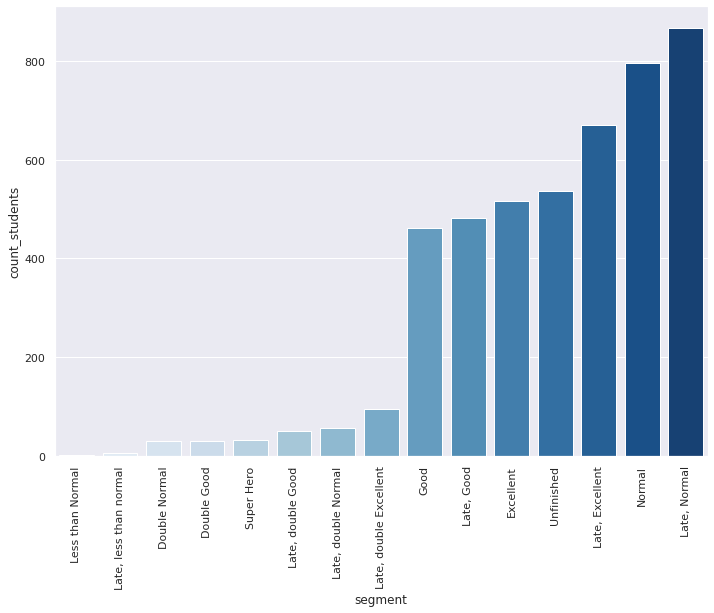

In [22]:
#17

#Зададим размер граффика
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Создадим граффик
group_for_segment_rfm_barplot = sns.barplot(data=group_for_segment_rfm.sort_values('count_students'), 
                                            x='segment', 
                                            y='count_students', 
                                            palette='Blues')

#Добавим подписи оси х
group_for_segment_rfm_barplot.set_xticklabels(group_for_segment_rfm.segment, 
                                              rotation=90)